In [1]:
import tensorflow as tf
import numpy as np
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.metrics import confusion_matrix

In [ ]:
! ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle
! mv kaggle.json ~/.kaggle
! kaggle datasets download mahmoudima/mma-facial-expression

 92% 153M/166M [00:01<00:00, 142MB/s]
100% 166M/166M [00:01<00:00, 147MB/s]


In [3]:
datasetPath = "./drive/MyDrive/Colab Notebooks/Capstone Project/Facial Expression Dataset Filtered.zip"

with zipfile.ZipFile(datasetPath) as file :
    file.extractall()

In [4]:
import os

modelDir = "./drive/MyDrive/Colab Notebooks/Capstone Project/Saved Model/"
fileName = "model4.zip"

with zipfile.ZipFile(os.path.join(modelDir, fileName)) as file :
    file.extractall()

In [9]:
import tensorflow as tf

model = tf.keras.models.load_model("./model4")

In [ ]:
model.summary()

In [10]:
def prepareImage(path):
    #img = tf.keras.preprocessing.image.load_img(file, target_size=(224, 224))
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (48, 48))
    img = tf.keras.preprocessing.image.img_to_array(img)
    #return img
    #img = np.expand_dims(img, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 48, 48, 3)


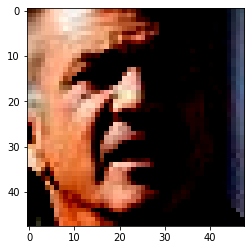

[[8.7392813e-01 5.6134583e-04 1.4086793e-02 1.1142379e-01]] 
 angry


In [12]:
#img = cv2.imread("./Happy.22532.jpg")
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.resize(img, (48, 48))
img = prepareImage("./Facial Expression Dataset Filtered/test/angry/10Exp0angry_actor_150.jpg")
img = np.expand_dims(img, axis=0)
print(img.shape)

plt.imshow(img[0])
plt.show()

expression = ["angry", "happy", "neutral", "sad"]

prediction = model.predict(img)
print(prediction, "\n", expression[np.argmax(prediction)])

In [14]:
#testDir = "./Facial Expression Dataset/test/"
testDir = "./Facial Expression Dataset Filtered/test/"
#expression = ["angry", "happy", "neutral", "sad"]
#expression = ["angry", "happy"]

imgTest = []
labelTest = []

numOfData = 500
for label, labelName in enumerate(expression) :
    for i in tqdm(os.listdir(testDir + labelName)[:numOfData]) :
        imgTest.append(prepareImage(os.path.join(testDir, labelName, i)))
        tempLabel = np.zeros(len(expression))
        tempLabel[label] = 1
        labelTest.append(tempLabel)
        #labelTrain.append(label)
        #imgTrain = np.concatenate((imgTrain, prepareImage(trainDir + i + "/" + j)))

imgTest = np.array(imgTest)
labelTest = np.array(labelTest)

prediction = model.predict(imgTest)
cm = confusion_matrix(np.argmax(labelTest, axis=1), np.argmax(prediction, axis=1))
print(cm)
#for i in prediction :
#    print(np.argmax(i))

100%|██████████| 500/500 [00:00<00:00, 3371.45it/s]


[[386  15  36  63]
 [ 33 246 132  89]
 [ 66  33 271 130]
 [ 79  37 113 271]]


In [ ]:
!pip3 install deepface

In [ ]:
from deepface import DeepFace

prediction = DeepFace.analyze(img[0], actions = ["emotion"])
prediction

{'dominant_emotion': 'happy',
 'emotion': {'angry': 24.88410919213946,
  'disgust': 9.874668338729875e-08,
  'fear': 0.0893873972546248,
  'happy': 39.34255476847618,
  'neutral': 31.585486625759998,
  'sad': 0.07095940368380568,
  'surprise': 4.027501733750208},
 'region': {'h': 44, 'w': 32, 'x': 10, 'y': 3}}

In [ ]:
!pip3 install fileupload

In [ ]:
from IPython.display import display
import fileupload

uploader = fileupload.FileUploadWidget()

def _handle_upload(change):
    w = change['owner']
    with open(w.filename, 'wb') as f:
        f.write(w.data)
    print('Uploaded `{}` ({:.2f} kB)'.format(
        w.filename, len(w.data) / 2**10))

uploader.observe(_handle_upload, names='data')

display(uploader)

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))